## Intro

Performing exploratory data analysis on a cybersecurity threat dataset to identify attack trends, severity distribution, affected devices, and geographical patterns using Prompts.


## Prompt Used for Dataset Creation (Copilot AI)

"Generate a synthetic cybersecurity threat dataset in CSV format with more than 300 records.
Include columns such as incident_id, timestamp, attack_type, attack_vector, severity,
source_country, target_country, source_ip, device_affected, operating_system,
target_system, protocol, port, status, detected_by, impact_level, and mitigation_action.
Ensure the dataset is realistic, consistent, and suitable for data analysis.
Output only the CSV content."


##**Loading a Dataset**

In [ ]:
import pandas as pd

df = pd.read_csv("/content/synthetic_cyber_threats_300.csv")
df.head()


,incident_id,timestamp,attack_type,attack_vector,severity,source_country,target_country,source_ip,destination_ip,device_affected,operating_system,target_system,port,protocol,status,detected_by,response_time_minutes,data_compromised,impact_level,mitigation_action
0,INC0001,2025-06-03 13:56:29,SQL Injection,API,Medium,Germany,China,220.63.39.84,70.88.151.251,Cloud VM,Windows,Network Device,3389,UDP,Failed,Firewall,105.05,Yes,High,Patch Applied
1,INC0002,2025-11-08 02:45:20,Ransomware,API,High,Brazil,Russia,150.128.225.159,159.20.97.197,Mobile,Android,Database Server,80,TCP,Failed,SIEM,109.86,No,Low,Traffic Filtered
2,INC0003,2025-05-23 07:14:32,SQL Injection,Email,Critical,UK,China,17.181.85.191,79.156.50.166,Database,macOS,Database Server,22,TCP,Blocked,Firewall,81.33,Yes,Medium,Traffic Filtered
3,INC0004,2025-03-13 00:51:58,DDoS,Email,High,USA,China,132.107.13.224,123.167.26.173,Laptop,Windows,Web Server,22,HTTP,Failed,Firewall,119.19,No,Medium,Traffic Filtered
4,INC0005,2025-03-29 18:37:13,Malware,USB,Medium,UK,Germany,86.55.105.71,125.78.86.180,Database,Linux,Database Server,22,HTTPS,Successful,SIEM,69.68,No,Low,Account Disabled


## Prompt Used for Dataset Overview

Display basic information, structure, and size of the cybersecurity dataset to understand its contents.


In [ ]:
df.shape


(300, 20)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   incident_id            300 non-null    object 
 1   timestamp              300 non-null    object 
 2   attack_type            300 non-null    object 
 3   attack_vector          300 non-null    object 
 4   severity               300 non-null    object 
 5   source_country         300 non-null    object 
 6   target_country         300 non-null    object 
 7   source_ip              300 non-null    object 
 8   destination_ip         300 non-null    object 
 9   device_affected        300 non-null    object 
 10  operating_system       300 non-null    object 
 11  target_system          300 non-null    object 
 12  port                   300 non-null    int64  
 13  protocol               300 non-null    object 
 14  status                 300 non-null    object 
 15  detect

## Prompt Used for Timestamp Processing

"Convert the timestamp column into a datetime format to enable time-based cyber attack analysis."


In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
print(df)


    incident_id           timestamp    attack_type attack_vector  severity  \
0       INC0001 2025-06-03 13:56:29  SQL Injection           API    Medium   
1       INC0002 2025-11-08 02:45:20     Ransomware           API      High   
2       INC0003 2025-05-23 07:14:32  SQL Injection         Email  Critical   
3       INC0004 2025-03-13 00:51:58           DDoS         Email      High   
4       INC0005 2025-03-29 18:37:13        Malware           USB    Medium   
..          ...                 ...            ...           ...       ...   
295     INC0296 2025-05-23 04:57:01    Brute Force           USB    Medium   
296     INC0297 2025-02-28 14:10:21     Ransomware           API      High   
297     INC0298 2025-11-06 16:29:52           DDoS         Email      High   
298     INC0299 2025-12-09 15:43:51     Ransomware           USB    Medium   
299     INC0300 2025-07-12 23:08:45  SQL Injection           API      High   

    source_country target_country        source_ip  destination

## Prompt Used for Attack Type Analysis

"Analyze the frequency of different types of cyber attacks using appropriate visualizations."


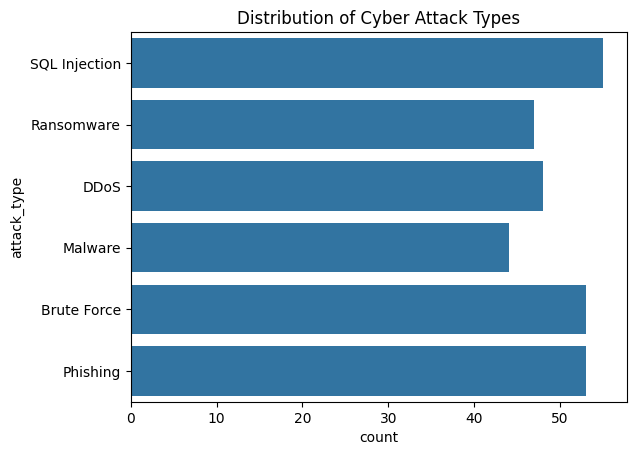

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.countplot(y="attack_type", data=df)
plt.title("Distribution of Cyber Attack Types")
plt.show()


## Prompt Used for Severity Level Analysis

"Visualize the distribution of cyber attacks based on severity levels."


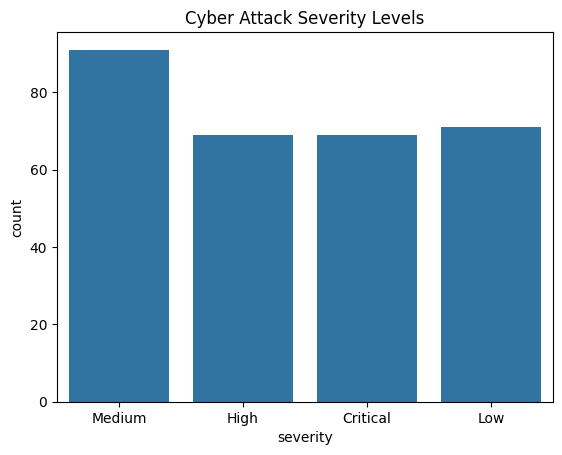

In [ ]:
plt.figure()
sns.countplot(x="severity", data=df)
plt.title("Cyber Attack Severity Levels")
plt.show()


## Prompt Used for Device Impact Analysis

"Identify which devices are most frequently affected by cyber attacks."


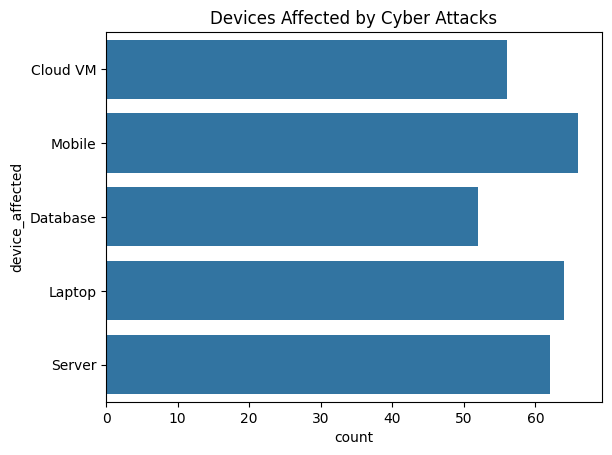

In [ ]:
plt.figure()
sns.countplot(y="device_affected", data=df)
plt.title("Devices Affected by Cyber Attacks")
plt.show()


## Prompt Used for Severity by Attack Type Analysis

"Analyze how the severity of cyber attacks varies across different attack types using visual comparison."

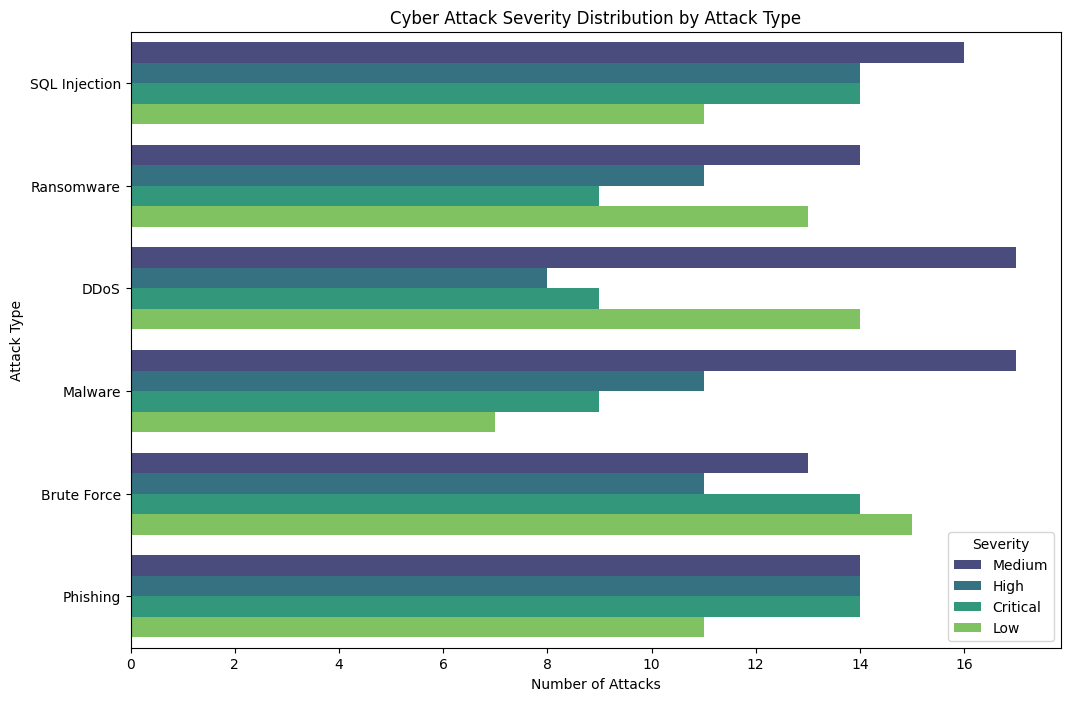

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(y="attack_type", hue="severity", data=df, palette="viridis")
plt.title("Cyber Attack Severity Distribution by Attack Type")
plt.xlabel("Number of Attacks")
plt.ylabel("Attack Type")
plt.legend(title="Severity")
plt.show()

## Prompt Used for Time-Series Analysis

"Analyze trends in cyber attacks over time using the timestamp column."


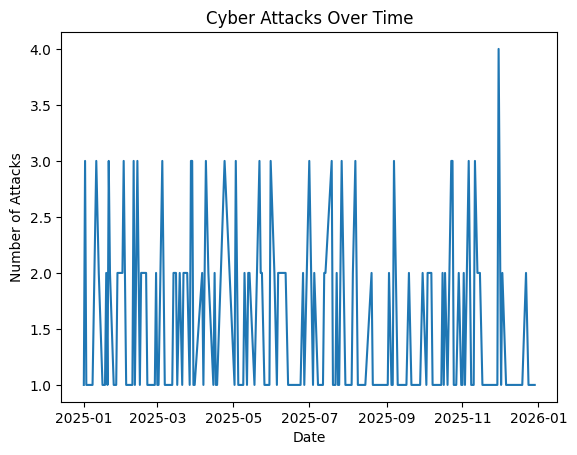

In [ ]:
df['date'] = df['timestamp'].dt.date
daily_attacks = df.groupby('date').size()

plt.figure()
daily_attacks.plot()
plt.title("Cyber Attacks Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Attacks")
plt.show()


## Prompt Used for Geographical Analysis

"Analyze cyber attacks based on source countries to identify geographical patterns."

## Prompt Used for Target System Analysis

"Identify the most frequently targeted systems in cyber attacks."

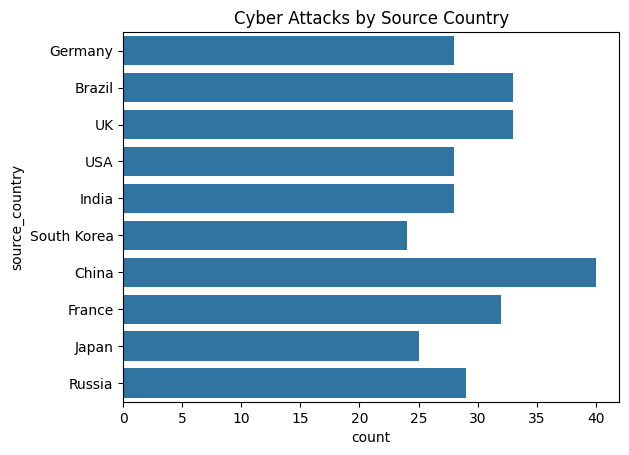

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.countplot(y="source_country", data=df)
plt.title("Cyber Attacks by Source Country")
plt.show()

## Prompt Used for Severity Trend Analysis

"Analyze how cyber attack severity changes over time."


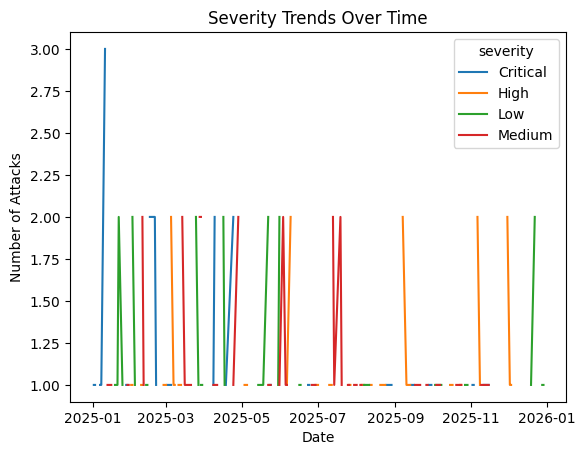

In [ ]:
severity_trend = df.groupby([df['timestamp'].dt.date, 'severity']).size().unstack()

severity_trend.plot()
plt.title("Severity Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Attacks")
plt.show()


## Prompt Used for Attack Outcome Analysis

"Analyze the proportion of successful versus blocked cyber attacks."


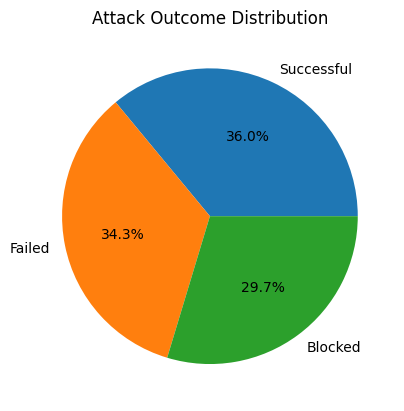

In [ ]:
plt.figure()
df['status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Attack Outcome Distribution")
plt.ylabel("")
plt.show()


## Prompt Used for Mitigation Action Analysis

"Analyze the most commonly used mitigation actions against cyber attacks."


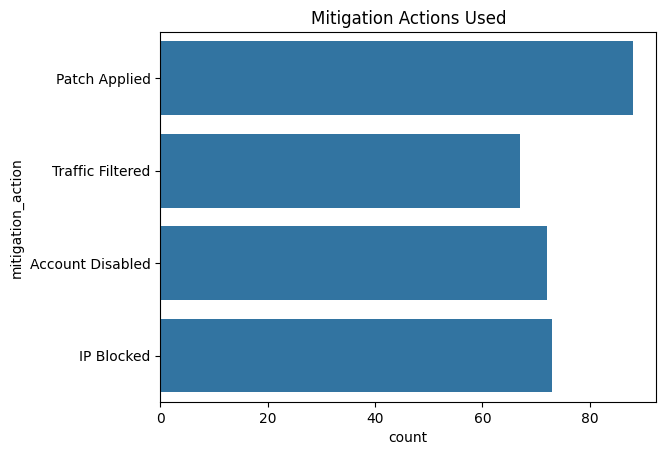

In [ ]:
plt.figure()
sns.countplot(y="mitigation_action", data=df)
plt.title("Mitigation Actions Used")
plt.show()


## Prompt Used for Detection Method Analysis

"Analyze how cyber attacks are detected to understand effectiveness of security controls."


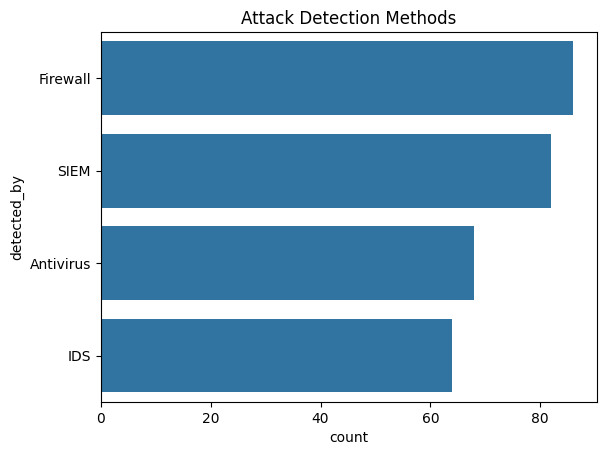

In [ ]:
plt.figure()
sns.countplot(y="detected_by", data=df)
plt.title("Attack Detection Methods")
plt.show()


## Explanation

This analysis was performed on a synthetic cybersecurity threat dataset generated using Copilot AI through structured prompting.
The step-by-step exploratory analysis identified attack patterns based on type, severity, affected devices, geography, and time.
Such analysis supports the development of interactive cyber threat visualization dashboards and informed security decision-making.


## Prompting Declaration

This Python task was completed using AI-based prompting.
Prompts were used to generate the dataset, load and process data, perform exploratory analysis, and visualize cybersecurity threats.
